### Importing the Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('adult_salary.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
df.shape

(48842, 15)

In [4]:
df['workclass'] = df['workclass'].replace('?',np.nan)
df['occupation'] = df['occupation'].replace('?',np.nan)

In [5]:
df.dropna(how='any',inplace=True)

In [6]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [7]:
df.shape

(46033, 15)

In [8]:
df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

### Removing the Outliers

C:\Users\Hai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hours-per-week'>

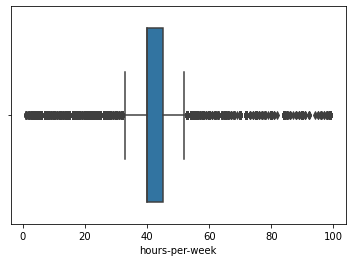

In [9]:
sns.boxplot(df['hours-per-week'])

In [10]:
def remove_outlier(df):
    IQR = df['hours-per-week'].quantile(0.75) - df['hours-per-week'].quantile(0.25) 
    
    lower_range = df['hours-per-week'].quantile(0.25) - (1.5 * IQR)
    upper_range = df['hours-per-week'].quantile(0.75) + (1.5 * IQR)
    
    df.loc[df['hours-per-week'] <= lower_range, 'hours-per-week'] = lower_range
    df.loc[df['hours-per-week'] >= upper_range, 'hours-per-week'] = upper_range

In [11]:
remove_outlier(df)

C:\Users\Hai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hours-per-week'>

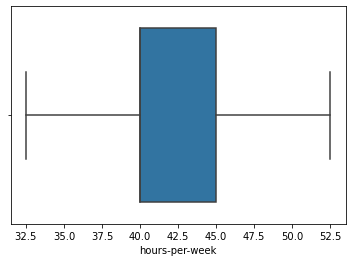

In [12]:
sns.boxplot(df['hours-per-week'])

C:\Users\Hai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='educational-num'>

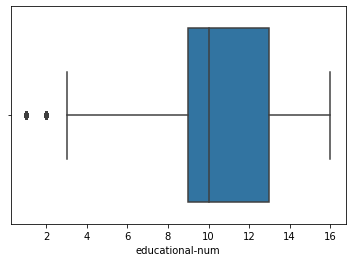

In [13]:
sns.boxplot(df['educational-num'])

In [14]:
def remove_outlier_educationalnum(df):
    IQR = df['educational-num'].quantile(0.75) - df['educational-num'].quantile(0.25) 
    
    lower_range = df['educational-num'].quantile(0.25) - (1.5 * IQR)
    upper_range = df['educational-num'].quantile(0.75) + (1.5 * IQR)
    
    df.loc[df['educational-num'] <= lower_range, 'educational-num'] = lower_range
    df.loc[df['educational-num'] >= upper_range, 'educational-num'] = upper_range

In [15]:
remove_outlier_educationalnum(df)

C:\Users\Hai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='educational-num'>

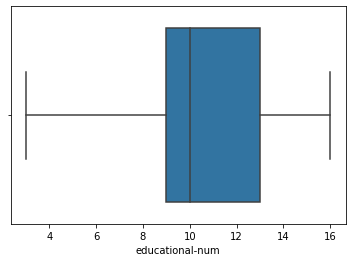

In [16]:
sns.boxplot(df['educational-num'])

C:\Users\Hai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='capital-loss'>

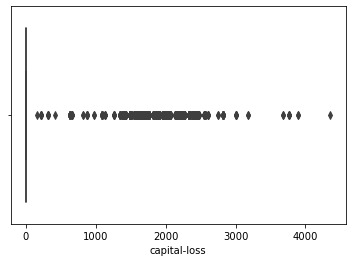

In [17]:
sns.boxplot(df['capital-loss'])

In [18]:
def remove_outlier_capitalloss(df):
    IQR = df['capital-loss'].quantile(0.75) - df['capital-loss'].quantile(0.25) 
    
    lower_range = df['capital-loss'].quantile(0.25) - (1.5 * IQR)
    upper_range = df['capital-loss'].quantile(0.75) + (1.5 * IQR)
    
    df.loc[df['capital-loss'] <= lower_range, 'capital-loss'] = lower_range
    df.loc[df['capital-loss'] >= upper_range, 'capital-loss'] = upper_range

In [19]:
remove_outlier_capitalloss(df)

C:\Users\Hai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='capital-loss'>

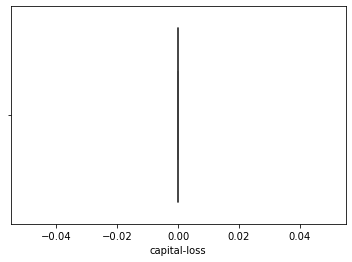

In [20]:
sns.boxplot(df['capital-loss'])

### Plotting Correlation Graph

<AxesSubplot:>

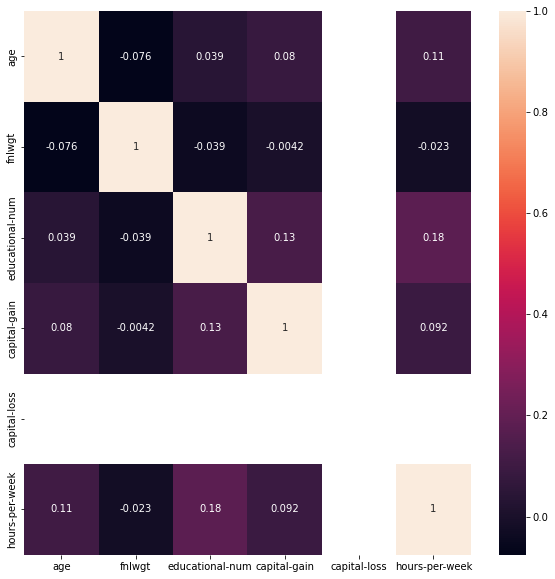

In [21]:
plt.figure(figsize = (10, 10))
corr = df.corr()
sns.heatmap(corr, annot=True)

### Drop Columns based on the Correlation Graph

In [22]:
df = df.drop('fnlwgt',axis=1)

In [23]:
df.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40.0,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50.0,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40.0,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40.0,United-States,>50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,32.5,United-States,<=50K


### Initiating Feature Engineering 

In [24]:
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1}).astype(int)

In [25]:
df.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,0,0,0,40.0,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,0,0,0,50.0,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,0,0,0,40.0,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,0,7688,0,40.0,United-States,>50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,0,0,0,32.5,United-States,<=50K


In [26]:
def feature_eng(df):
    clmtitle_enco_race = {value: key for key, value in enumerate(df['race'].unique())}
    df['race'] = df['race'].map(clmtitle_enco_race)
    
    clmtitle_enco_relationship = {value: key for key, value in enumerate(df['relationship'].unique())}
    df['relationship'] = df['relationship'].map(clmtitle_enco_relationship)
    
    clmtitle_enco_occupation = {value: key for key, value in enumerate(df['occupation'].unique())}
    df['occupation'] = df['occupation'].map(clmtitle_enco_occupation)
    
    clmtitle_enco_maritalstatus = {value: key for key, value in enumerate(df['marital-status'].unique())}
    df['marital-status'] = df['marital-status'].map(clmtitle_enco_maritalstatus)
    
    clmtitle_enco_education = {value: key for key, value in enumerate(df['education'].unique())}
    df['education'] = df['education'].map(clmtitle_enco_education)
    
    clmtitle_enco_workclass = {value: key for key, value in enumerate(df['workclass'].unique())}
    df['workclass'] = df['workclass'].map(clmtitle_enco_workclass)
    
    df['native-country'] = np.where(df['native-country'] == '?', 'Missing', df['native-country'])
    clmtitle_enco_nativecountry = {value: key for key, value in enumerate(df['native-country'].unique())}
    df['native-country'] = df['native-country'].map(clmtitle_enco_nativecountry)
    
    return df

In [27]:
feature_eng(df)

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,0,0,7,0,0,0,0,0,0,0,40.0,0,<=50K
1,38,0,1,9,1,1,1,1,0,0,0,50.0,0,<=50K
2,28,1,2,12,1,2,1,1,0,0,0,40.0,0,>50K
3,44,0,3,10,1,0,1,0,0,7688,0,40.0,0,>50K
5,34,0,4,6,0,3,2,1,0,0,0,32.5,0,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,0,2,12,1,8,4,1,1,0,0,38.0,0,<=50K
48838,40,0,1,9,1,0,1,1,0,0,0,40.0,0,>50K
48839,58,0,1,9,2,6,3,1,1,0,0,40.0,0,<=50K
48840,22,0,1,9,0,6,0,1,0,0,0,32.5,0,<=50K


In [28]:
df.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,0,0,7,0,0,0,0,0,0,0,40.0,0,<=50K
1,38,0,1,9,1,1,1,1,0,0,0,50.0,0,<=50K
2,28,1,2,12,1,2,1,1,0,0,0,40.0,0,>50K
3,44,0,3,10,1,0,1,0,0,7688,0,40.0,0,>50K
5,34,0,4,6,0,3,2,1,0,0,0,32.5,0,<=50K


### Initiating Scaling Process

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
sc =  StandardScaler()

In [32]:
X = df[['age', 'workclass', 'education','educational-num', 'marital-status', 'occupation', 'relationship',
        'race', 'gender','capital-gain', 'capital-loss', 'hours-per-week', 'native-country']]

In [33]:
y = df['income']

In [34]:
y.value_counts()

<=50K    34611
>50K     11422
Name: income, dtype: int64

In [35]:
X =  sc.fit_transform(X)

### Train,Test and Model Building

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [40]:
print("Train data shape: {}".format(X_train.shape))
print("Test data shape: {}".format(X_test.shape))

Train data shape: (36826, 13)
Test data shape: (9207, 13)


In [41]:
lg_model = LogisticRegression()

In [42]:
lg_model.fit(X_train, y_train)

LogisticRegression()

In [43]:
y_pred = lg_model.predict(X_test)

In [44]:
result = {
    'Actual': y_test,
    'Predicted': y_pred
}

In [45]:
pd.DataFrame(result)

,Actual,Predicted
17801,<=50K,<=50K
40373,<=50K,<=50K
44817,>50K,>50K
39139,<=50K,>50K
15972,<=50K,<=50K
...,...,...
4680,<=50K,<=50K
2298,>50K,>50K
20081,<=50K,<=50K
36023,<=50K,<=50K


### Model Accuracy and its Metrics

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [48]:
print("Accuracy Score: {}".format(accuracy_score(y_test,y_pred)),"\n")
print("Confusion Matrix: {}".format(confusion_matrix(y_test,y_pred)),"\n")
print("Classification Report: {}".format(classification_report(y_test,y_pred)),"\n")

Accuracy Score: 0.8162267839687195 

Confusion Matrix: [[6494  368]
 [1324 1021]] 

Classification Report:               precision    recall  f1-score   support

       <=50K       0.83      0.95      0.88      6862
        >50K       0.74      0.44      0.55      2345

    accuracy                           0.82      9207
   macro avg       0.78      0.69      0.72      9207
weighted avg       0.81      0.82      0.80      9207
 



### Saving Model as File

In [49]:
import pickle

In [50]:
file = open('lg_model.pkl', 'wb')

In [51]:
pickle.dump(lg_model, file)